<a href="https://www.kaggle.com/code/imenbakir/keratoconus-early-stage-detection?scriptVersionId=98201523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

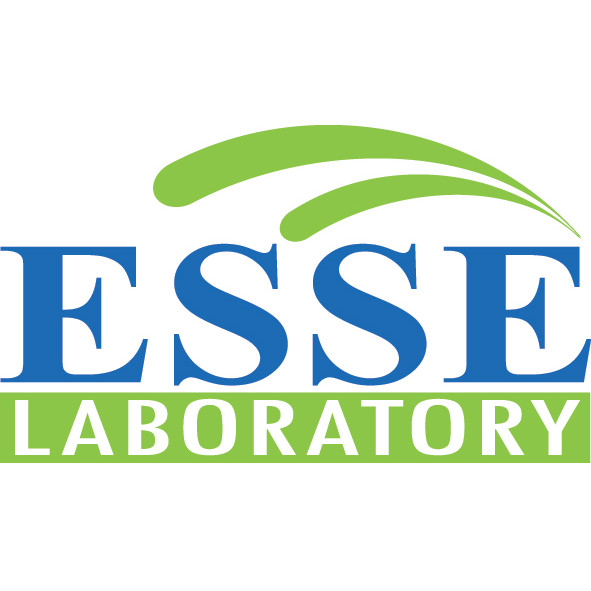
<img align =right src = "https://www.mastere.tn/wp-content/uploads/2020/07/enetcomlogo.png" width ="200"/>
<img align =center src = "https://moodle.devsfax.org/pluginfile.php/55961/coursecat/description/logo.png" width ="250"/>

# Early and automatic detection of keratoconus disease #

## 01 - Overview of keratoconus disease and Data Pre-processing ##
This project's purpose consists of using new artificial intelligence technologies and concepts for the early detection and automatic detection of the keratoconus disease. The goal is to demonstrate how supervised ML techniques can be used to classify data with high number of features, and can show high accuracy scores, along with aiming to define the best model and deploy it with an interface to allow real-time testing if patient has keratoconus or not and predict the stage of the disease.

**Table of Contents**
<br>
This notebook covers the below sections: 
1. [Keratoconus: Overview](#s1-1)
    * [Signs](#s1-1.1) 
    * [Causes](#s1-1.2)
    * [Diagnosis](#s1-1.3)
    * [OCT images](#s1-1.4)
    * [ORBSCAN](#s1-1.5)
    * ..
2. [Data Pre-processing](#s2-1)
    * [Introducing the data](#s2-1.1)
    * [Cleaning the data](#s2-1.2)
    * [Normalisation of the data](#s2-1.3)
    * ..

***

<a name='s1-1'></a>
## Keratoconus: Overview ##
__Keratoconus__ (ker-uh-toe-KOH-nus) is a progressive eye disease of the __cornea__ — the clear, dome-shaped front surface of the eye — which, normally has a round, smooth and regular surface, but for someone with keratoconus, the cornea progressively thins and gradually bulges outward into a <font color=blue>cone shape</font> over time, which can lead in some serious cases, to irregular <font color=blue>astigmatism</font> [1](https://www.mayoclinic.org/diseases-conditions/astigmatism/symptoms-causes/syc-20353835) and <font color=blue>scarring of the cornea</font>.[2](https://www.sciencedirect.com/science/article/abs/pii/S0039625797001197)

A cone-shaped cornea often leads to blurry and distorted eye sight and may cause sensitivity to light and glare. 

Early stage keratoconus is the primary risk factor for post-LASIK ectasia, a serious complication of laser refractive surgeries.

Keratoconus usually affects both eyes, though it often affects one eye more than the other. It generally begins to affect people between the ages of 10 and 25. The condition may progress slowly for 10 years or longer, and can become so severe that it can require a corneal transplant if not caught early.

<img align=right src = "https://www.clevelandeyeclinic.com/wp-content/uploads/2016/11/keratoconus_vs_normal.jpg" width="350">
<img align=center src = "https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2019/03/18/22/34/keratoconus-8col-3080463-001-0.jpg" width="500">


***

<a name='s1-1.1'></a> 
### Signs ###
Signs and symptoms of keratoconus may change as the disease progresses. They include:
* Blurred or distorted vision and shadowing of letters which comes from the irregular astigmatism caused by the cone shape of the eye.
* A need for frequent changes in eyeglass prescriptions, usually in the matter of a few weeks to months.
* If left to progress, Keratoconus leads to scarring of the cornea which causes increased sensitivity to bright light and glare and a blurred vision. This can cause problems with night driving.
* Sudden worsening or clouding of vision
* In extreme conditions, the cornea becomes so thin that it becomes painful, so the earlier to be able to catch Keratoconus, the more chance to stop its progression.



****

<a name='s1-1.2'></a>
### Causes ###
The definitive cause of keratoconus is unknown, although it is believed to be caused by __genetic__ and __environmental factors__ . Some of the causes involved can be:
* An enzymatic breakdown of the collagene structures within the cornea. [3](https://livrepository.liverpool.ac.uk/3090211/)
* Having a family history of keratoconus.
* Rubbing your eyes vigorously, caused by eye allergies or just irritation in general.
* Having certain conditions, such as retinitis pigmentosa [4](https://en.wikipedia.org/wiki/Retinitis_pigmentosa), Down syndrome [5](https://en.wikipedia.org/wiki/Down_syndrome), Ehlers-Danlos syndrome [6](https://en.wikipedia.org/wiki/Ehlers%E2%80%93Danlos_syndromes), hay fever [7](https://en.wikipedia.org/wiki/Allergic_rhinitis) and asthma [8](https://en.wikipedia.org/wiki/Asthma) .
***

<a name='s1-1.3'></a>
### Diagnosis ###
The diagnosis of Keratoconus is usually done by an ophthalmologist or an optometrist through an eye exam, along with other exams such as reviewing the medical and family history of the patient.

Often, various tools and technologies are used to determine more details regarding the shape of the patient's cornea. 

Tests to diagnose keratoconus include:
* __Eye refraction__: in which the doctor will use special equipment that measures eyes to check for vision problems.
<img src="https://www.verywellhealth.com/thmb/0mv6jXiB6CVtIll6HTsyVxb2bOc=/3867x2175/smart/filters:no_upscale()/GettyImages-180406476-56c5f88d5f9b58e9f33572d1.jpg" align ='center' width="300"/>
* __Slit-lamp examination__: in which the doctor will evaluate the shape of the cornea and looks for other potential problems in the patient's eye, by directing a vertical beam of light on its surface and using a low-powered microscope to view it. 

* __Keratometry__: In this test the eye doctor focuses a circle of light on the cornea and measures the reflection to determine the basic shape of the cornea.

* __Computerized corneal mapping__: Which consists of special photographic tests, such as corneal tomography and corneal topography. It is basically recording images to create a detailed shape map of the cornea.

  * <font color='red'>corneal topography:</font> by taking a picture of the eye with an instrument called corneal topographer, we can easily detect the changes of the cone that is developping in the surface of the eye.
  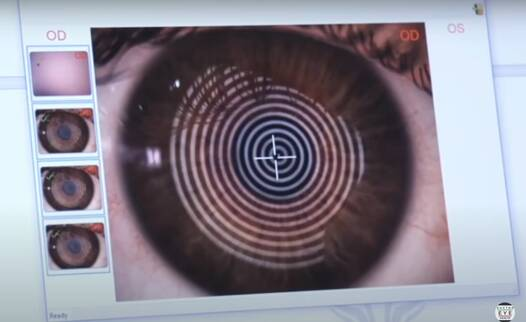
  
    <img src="https://images.ctfassets.net/u4vv676b8z52/7dSFrf8D45lr0CDgUB5ZF0/1caa41c858ed9905337fe1445f1fc8e6/corneal-topography-678x446.gif?fm=jpg&q=80" align ='center' width="250">
  
  
  * <font color='red'> corneal tomography:</font> that is getting many B-scan ultrasounds of the eye [9](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2765186/). It helps to see how thin the cornea is at different locations, especially on the back surface of the cornea which is the first sign of Keratoconus that can be detected. This can be detected well before having to detect any cone shape on the surface of the eye by the slit-lamp exam.
 
 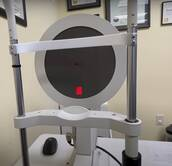
  
  
***  

<a name='s1-1.4'></a>
### OCT images ###

An __OCT -Optical coherence tomography- imaging__ is a noncontact imaging of the cornea with micron-level high resolution. It is used to obtain images of the corneal thickness of normal and keratoconic eyes. [10](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4068244/#:~:text=Optical%20coherence%20tomography%20(OCT)%20is,of%20normal%20and%20keratoconic%20eyes.)

It can image the deeper layers or the retina beneath the surface where the early stage of the disease starts, that often causes a mucular hole in the retina.

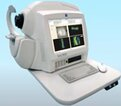
<img align=center src = "https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs40662-018-0107-0/MediaObjects/40662_2018_107_Fig2_HTML.png" width="500">

<img align=center src = "https://advancedeyehospital.com/uploads/aehi-images/m1.png" width="600">
<img align=center src = "https://www.researchgate.net/profile/Christoph-Hitzenberger/publication/51467852/figure/fig6/AS:267987819167756@1440904683820/Images-of-keratoconus-cornea-Orbscan-thickness-map-invivo-A-color-bar-mm-corneal.png" width="650">

[11](https://www.researchgate.net/figure/Images-of-keratoconus-cornea-Orbscan-thickness-map-invivo-A-color-bar-mm-corneal_fig6_51467852)

<img align=center src = "https://images.squarespace-cdn.com/content/v1/5cee89c0419523000190470e/4cf4411e-e526-45d7-ba07-79a8989e15f5/Corneal+Disease.jpg" width="400">

***

<a name='s1-1.5'></a>
### ORBSCAN ###
___The Orbscan corneal topography system___ is a device to evaluate corneal topography that measures the thickness and shape of both the front and back surfaces of the cornea, providing a three-dimensional map of the complete corneal structure using a scanning optical slit device.

***

<a name='s2-1'></a>
## Data Pre-processing ##

<a name='s2-1.1'></a>
### Introducing the data ###

In [1]:
#import data and take a look
import numpy as np #to manipulate numerical data
import pandas as pd #for data manipulation and analysis
import seaborn as sns 
import matplotlib.pyplot as plt
#for visualization 
data = pd.read_csv(r"../input/keratoconus-stage-detection/dataset.csv")

The dataset that we'll be using is a CSV file containing information about different patients' eyes in order to detect keratoconus disease

In [2]:
data.head(10) #prints first 10 columns of the data

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


As we can see the dataset has a lot of columns, so the read_csv function will not show all of them. But if we change the settings to :

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
data = pd.read_csv(r"../input/keratoconus-stage-detection/dataset.csv")
data.head(5)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,Kf.1,Kf.Axis.1,AvgK.1,CYL.1,AA.1,Ecc.9.0mm..1,Ks.2,Ks.Axis.2,Kf.2,Kf.Axis.2,AvgK.2,CYL.2,AA.2,Ecc.9.0mm..2,Ks.3,Ks.Axis.3,Kf.3,Kf.Axis.3,AvgK.3,CYL.3,AA.3,Apex,Thinnest,LocationX,LocationY,Spherical,Regular,Regular.Axis,Asymmetry,Asymmetry.Axis,HigherOrder,Spherical.1,Regular.1,Regular.Axis.1,Asymmetry.1,Asymmetry.Axis.1,HigherOrder.1,Spherical.2,Regular.2,Regular.Axis.2,Asymmetry.2,Asymmetry.Axis.2,HigherOrder.2,Spherical.3,Regular.3,Regular.Axis.3,Asymmetry.3,Asymmetry.Axis.3,HigherOrder.3,Spherical.4,Regular.4,Regular.Axis.4,Asymmetry.4,Asymmetry.Axis.4,HigherOrder.4,Spherical.5,Regular.5,Regular.Axis.5,Asymmetry.5,Asymmetry.Axis.5,HigherOrder.5,Spherical.6,Regular.6,Regular.Axis.6,Asymmetry.6,Asymmetry.Axis.6,HigherOrder.6,Spherical.7,Regular.7,Regular.Axis.7,Asymmetry.7,Asymmetry.Axis.7,HigherOrder.7,X,Y,X.1,Y.1,X.2,Y.2,ApexK,Ks.0mm.,Ks.0mm..Axis,Kf.0mm.,Kf.0mm..Axis,AvgK.0mm.,CYL.0mm.,Ks.6mm.,Ks.6mm..Axis,Kf.6mm.,Kf.6mm..Axis,AvgK.6mm.,CYL.6mm.,DSI.4mm.,OSI.4mm.,MS.Axis.4mm.,DSI.5mm.,OSI.5mm.,MS.Axis.5mm.,DSI.6mm.,OSI.6mm.,MS.Axis.6mm.,DSI.9mm.,OSI.9mm.,MS.Axis.9mm.,CSI,SD_P.4mm.,CV_P.4mm.,ACP.3mm.,SAI,K.Max..8mm.,X.3,Y.3,K.Max..10mm.,X.4,Y.4,ApexK.1,Ks.0mm..1,Ks.0mm..Axis.1,Kf.0mm..1,Kf.0mm..Axis.1,AvgK.0mm..1,CYL.0mm..1,Ks.6mm..1,Ks.6mm..Axis.1,Kf.6mm..1,Kf.6mm..Axis.1,AvgK.6mm..1,CYL.6mm..1,DSI.4mm..1,OSI.4mm..1,MS.Axis.4mm..1,DSI.5mm..1,OSI.5mm..1,MS.Axis.5mm..1,DSI.6mm..1,OSI.6mm..1,MS.Axis.6mm..1,DSI.9mm..1,OSI.9mm..1,MS.Axis.9mm..1,CSI.1,SD_P.4mm..1,CV_P.4mm..1,ACP.3mm..1,SAI.1,K.Max..8mm..1,X.5,Y.5,K.Max..10mm..1,X.6,Y.6,ApexK.2,Ks.0mm..2,Ks.0mm..Axis.2,Kf.0mm..2,Kf.0mm..Axis.2,AvgK.0mm..2,CYL.0mm..2,Ks.6mm..2,Ks.6mm..Axis.2,Kf.6mm..2,Kf.6mm..Axis.2,AvgK.6mm..2,CYL.6mm..2,DSI.4mm..2,OSI.4mm..2,MS.Axis.4mm..2,DSI.5mm..2,OSI.5mm..2,MS.Axis.5mm..2,DSI.6mm..2,OSI.6mm..2,MS.Axis.6mm..2,DSI.9mm..2,OSI.9mm..2,MS.Axis.9mm..2,CSI.2,SD_P.4mm..2,CV_P.4mm..2,ACP.3mm..2,SAI.2,K.Max..8mm..2,X.7,Y.7,K.Max..10mm..2,X.8,Y.8,Steepest,X.9,Y.9,Steepest.1,X.10,Y.10,Diameter,BFS_R,BFS_Ecc,BFS_OffX,BFS_OffY,BFS_OffZ,Highest.0mm.3mm.,X.11,Y.11,Highest.3mm.6mm.,X.12,Y.12,Highest.6mm.9mm.,X.13,Y.13,Highest.0mm.5mm.,X.14,Y.14,RMS_E.3mm.,RMS_E.4mm.,RMS_E.5mm.,RMS_E.6mm.,SR_E.4mm.,BFS_R.1,BFS_Ecc.1,BFS_OffX.1,BFS_OffY.1,BFS_OffZ.1,Highest.0mm.3mm..1,X.15,Y.15,Highest.3mm.6mm..1,X.16,Y.16,Highest.6mm.9mm..1,X.17,Y.17,Highest.0mm.5mm..1,X.18,Y.18,RMS_E.3mm..1,RMS_E.4mm..1,RMS_E.5mm..1,RMS_E.6mm..1,SR_E.4mm..1,Ecc.3mm.,Ecc.4mm.,Ecc.5mm.,Ecc.6mm.,Ecc.7mm.,Ecc.8mm.,Ecc.9mm.,Ecc.12mm.,Ecc.15mm.,SR_H.3mm.,SR_H.4mm.,SR_H.5mm.,SR_H.6mm.,Avg_H.5mm.,Avg_H.6mm.,Avg_H.7mm.,Avg_H.8mm.,Avg_H.9mm.,Avg_H.10mm.,Ecc.3mm..1,Ecc.4mm..1,Ecc.5mm..1,Ecc.6mm..1,Ecc.7mm..1,Ecc.8mm..1,Ecc.9mm..1,Ecc.12mm..1,Ecc.15mm..1,SR_H.3mm..1,SR_H.4mm..1,SR_H.5mm..1,SR_H.6mm..1,Avg_H.5mm..1,Avg_H.6mm..1,Avg_H.7mm..1,Avg_H.8mm..1,Avg_H.9mm..1,Avg_H.10mm..1,CSI_T,SD_T.4mm.,SD_T.5mm.,SD_T.6mm.,CV_T.4mm.,CV_T.5mm.,CV_T.6mm.,PSI_SD.6mm.,PSI_CV.6mm.,Avg_T.6mm.,Thickest,LocationX.1,LocationY.1,Apex.1,Thinnest.4mm.,LocationX.2,LocationY.2,CSI_T.1,SD_T.4mm..1,CV_T.4mm..1,Apex.2,Thinnest.4mm..1,LocationX.3,LocationY.3,CSI_T.2,SD_T.4mm..2,CV_T.4mm..2,RMS_E.4mm..2,SR_E.4mm..2,Sph..Keratometric.,Reg..Keratometric.,Asy..Keratometric.,Hio..Keratometric.,Sph..Posterior.,Reg..Posterior.,Asy..Posterior.,Hio..Posterior.,Steepest.Posterior.,Thinnest.1,Score.Anterior.,AA.6mm..Anterior.,Score.Posterior.,AA.6mm..Posterior.,BFS.Angle0.360.Dia4.9.Float.,X.19,Y.19,Z,LD8.5,LD8.8,LD9.4,Height.Avg..Angle0.360.Dia8.FlatRate0.,R.Angle0.360.Dia8.FlatRate0.,Ks.4,Kf.4,AA.4,DSI,OSI,CSI.3,KPI,KCI,Result,MaxElv,MinElv,RangeElv,Result.1,MaxElv.1,MinElv.1,RangeElv.1,Result.2,Steepest.2,Result.3,Steepest.3,Result.4,LabelNum,Steepest.4,OffX,OffY,P_Contact,Area,AvgRc,Result.5,LabelNum.1,Steepest.5,OffX.1,OffY.1,P_Contact.1,Area.1,AvgRc.1,Result.6,Apex.3,X0deg,X45deg,X90deg,X135deg,X180deg,X225deg,X270deg,X315deg,X0deg.1,X45deg.1,X90deg.1,X

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [5]:
#returns number of (rows, columns)
data.shape

(3162, 448)

In [6]:
data.describe()

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,Kf.1,Kf.Axis.1,AvgK.1,CYL.1,AA.1,Ecc.9.0mm..1,Ks.2,Ks.Axis.2,Kf.2,Kf.Axis.2,AvgK.2,CYL.2,AA.2,Ecc.9.0mm..2,Ks.3,Ks.Axis.3,Kf.3,Kf.Axis.3,AvgK.3,CYL.3,AA.3,Apex,Thinnest,LocationX,LocationY,Spherical,Regular,Regular.Axis,Asymmetry,Asymmetry.Axis,HigherOrder,Spherical.1,Regular.1,Regular.Axis.1,Asymmetry.1,Asymmetry.Axis.1,HigherOrder.1,Spherical.2,Regular.2,Regular.Axis.2,Asymmetry.2,Asymmetry.Axis.2,HigherOrder.2,Spherical.3,Regular.3,Regular.Axis.3,Asymmetry.3,Asymmetry.Axis.3,HigherOrder.3,Spherical.4,Regular.4,Regular.Axis.4,Asymmetry.4,Asymmetry.Axis.4,HigherOrder.4,Spherical.5,Regular.5,Regular.Axis.5,Asymmetry.5,Asymmetry.Axis.5,HigherOrder.5,Spherical.6,Regular.6,Regular.Axis.6,Asymmetry.6,Asymmetry.Axis.6,HigherOrder.6,Spherical.7,Regular.7,Regular.Axis.7,Asymmetry.7,Asymmetry.Axis.7,HigherOrder.7,X,Y,X.1,Y.1,X.2,Y.2,ApexK,Ks.0mm.,Ks.0mm..Axis,Kf.0mm.,Kf.0mm..Axis,AvgK.0mm.,CYL.0mm.,Ks.6mm.,Ks.6mm..Axis,Kf.6mm.,Kf.6mm..Axis,AvgK.6mm.,CYL.6mm.,DSI.4mm.,OSI.4mm.,MS.Axis.4mm.,DSI.5mm.,OSI.5mm.,MS.Axis.5mm.,DSI.6mm.,OSI.6mm.,MS.Axis.6mm.,DSI.9mm.,OSI.9mm.,MS.Axis.9mm.,CSI,SD_P.4mm.,CV_P.4mm.,ACP.3mm.,SAI,K.Max..8mm.,X.3,Y.3,K.Max..10mm.,X.4,Y.4,ApexK.1,Ks.0mm..1,Ks.0mm..Axis.1,Kf.0mm..1,Kf.0mm..Axis.1,AvgK.0mm..1,CYL.0mm..1,Ks.6mm..1,Ks.6mm..Axis.1,Kf.6mm..1,Kf.6mm..Axis.1,AvgK.6mm..1,CYL.6mm..1,DSI.4mm..1,OSI.4mm..1,MS.Axis.4mm..1,DSI.5mm..1,OSI.5mm..1,MS.Axis.5mm..1,DSI.6mm..1,OSI.6mm..1,MS.Axis.6mm..1,DSI.9mm..1,OSI.9mm..1,MS.Axis.9mm..1,CSI.1,SD_P.4mm..1,CV_P.4mm..1,ACP.3mm..1,SAI.1,K.Max..8mm..1,X.5,Y.5,K.Max..10mm..1,X.6,Y.6,ApexK.2,Ks.0mm..2,Ks.0mm..Axis.2,Kf.0mm..2,Kf.0mm..Axis.2,AvgK.0mm..2,CYL.0mm..2,Ks.6mm..2,Ks.6mm..Axis.2,Kf.6mm..2,Kf.6mm..Axis.2,AvgK.6mm..2,CYL.6mm..2,DSI.4mm..2,OSI.4mm..2,MS.Axis.4mm..2,DSI.5mm..2,OSI.5mm..2,MS.Axis.5mm..2,DSI.6mm..2,OSI.6mm..2,MS.Axis.6mm..2,DSI.9mm..2,OSI.9mm..2,MS.Axis.9mm..2,CSI.2,SD_P.4mm..2,CV_P.4mm..2,ACP.3mm..2,SAI.2,K.Max..8mm..2,X.7,Y.7,K.Max..10mm..2,X.8,Y.8,Steepest,X.9,Y.9,Steepest.1,X.10,Y.10,Diameter,BFS_R,BFS_Ecc,BFS_OffX,BFS_OffY,BFS_OffZ,Highest.0mm.3mm.,X.11,Y.11,Highest.3mm.6mm.,X.12,Y.12,Highest.6mm.9mm.,X.13,Y.13,Highest.0mm.5mm.,X.14,Y.14,RMS_E.3mm.,RMS_E.4mm.,RMS_E.5mm.,RMS_E.6mm.,SR_E.4mm.,BFS_R.1,BFS_Ecc.1,BFS_OffX.1,BFS_OffY.1,BFS_OffZ.1,Highest.0mm.3mm..1,X.15,Y.15,Highest.3mm.6mm..1,X.16,Y.16,Highest.6mm.9mm..1,X.17,Y.17,Highest.0mm.5mm..1,X.18,Y.18,RMS_E.3mm..1,RMS_E.4mm..1,RMS_E.5mm..1,RMS_E.6mm..1,SR_E.4mm..1,Ecc.3mm.,Ecc.4mm.,Ecc.5mm.,Ecc.6mm.,Ecc.7mm.,Ecc.8mm.,Ecc.9mm.,Ecc.12mm.,Ecc.15mm.,SR_H.3mm.,SR_H.4mm.,SR_H.5mm.,SR_H.6mm.,Avg_H.5mm.,Avg_H.6mm.,Avg_H.7mm.,Avg_H.8mm.,Avg_H.9mm.,Avg_H.10mm.,Ecc.3mm..1,Ecc.4mm..1,Ecc.5mm..1,Ecc.6mm..1,Ecc.7mm..1,Ecc.8mm..1,Ecc.9mm..1,Ecc.12mm..1,Ecc.15mm..1,SR_H.3mm..1,SR_H.4mm..1,SR_H.5mm..1,SR_H.6mm..1,Avg_H.5mm..1,Avg_H.6mm..1,Avg_H.7mm..1,Avg_H.8mm..1,Avg_H.9mm..1,Avg_H.10mm..1,CSI_T,SD_T.4mm.,SD_T.5mm.,SD_T.6mm.,CV_T.4mm.,CV_T.5mm.,CV_T.6mm.,PSI_SD.6mm.,PSI_CV.6mm.,Avg_T.6mm.,Thickest,LocationX.1,LocationY.1,Apex.1,Thinnest.4mm.,LocationX.2,LocationY.2,CSI_T.1,SD_T.4mm..1,CV_T.4mm..1,Apex.2,Thinnest.4mm..1,LocationX.3,LocationY.3,CSI_T.2,SD_T.4mm..2,CV_T.4mm..2,RMS_E.4mm..2,SR_E.4mm..2,Sph..Keratometric.,Reg..Keratometric.,Asy..Keratometric.,Hio..Keratometric.,Sph..Posterior.,Reg..Posterior.,Asy..Posterior.,Hio..Posterior.,Steepest.Posterior.,Thinnest.1,Score.Anterior.,AA.6mm..Anterior.,Score.Posterior.,AA.6mm..Posterior.,BFS.Angle0.360.Dia4.9.Float.,X.19,Y.19,Z,LD8.5,LD8.8,LD9.4,Height.Avg..Angle0.360.Dia8.FlatRate0.,R.Angle0.360.Dia8.FlatRate0.,Ks.4,Kf.4,AA.4,DSI,OSI,CSI.3,KPI,KCI,Result,MaxElv,MinElv,RangeElv,Result.1,MaxElv.1,MinElv.1,RangeElv.1,Result.2,Steepest.2,Result.3,Steepest.3,Result.4,LabelNum,Steepest.4,OffX,OffY,P_Contact,Area,AvgRc,Result.5,LabelNum.1,Steepest.5,OffX.1,OffY.1,P_Contact.1,Area.1,AvgRc.1,Result.6,Apex.3,X0deg,X45deg,X90deg,X135deg,X180deg,X225deg,X270deg,X315deg,X0deg.1,X45deg.1,X90deg.1,X135deg

In [7]:
#when checking the dataset, i noticed that there are multiple columns named Result, Result.1, ...
#target variables ?
for col in data.columns:
    if (col.startswith("Result")):
        print(col)

Result
Result.1
Result.2
Result.3
Result.4
Result.5
Result.6


In [8]:
#for col in data.columns:
  #  print(col)
    
#checking the information in Result columns
print(data['Result'])
print('****************************************')
print(data['Result.1'])

0       1
1       1
2       0
3       0
4       1
       ..
3157    1
3158    1
3159    0
3160    1
3161    0
Name: Result, Length: 3162, dtype: int64
****************************************
0       1
1       0
2       0
3       0
4       0
       ..
3157    1
3158    0
3159    0
3160    0
3161    0
Name: Result.1, Length: 3162, dtype: int64


__notice that the result is binary (either 0 or 1)__

In [9]:
#returns counts of unique data types
data.dtypes.value_counts()

float64    319
int64      127
object       2
dtype: int64

In [10]:
#checking for columns with the type = object
sel_cols = [column for column, is_type in (data.dtypes=="object").items() if is_type]
sel_cols

['idEye', 'En.Anterior.']

In [11]:
print(data['En.Anterior.'])

0       Enable
1       Enable
2       Enable
3       Enable
4       Enable
         ...  
3157    Enable
3158    Enable
3159    Enable
3160    Enable
3161    Enable
Name: En.Anterior., Length: 3162, dtype: object


In [12]:
data['idEye']

0           1OS(Left)
1          1OD(Right)
2          2OD(Right)
3           4OS(Left)
4          4OD(Right)
            ...      
3157    1812OD(Right)
3158     1813OS(Left)
3159    1813OD(Right)
3160     1814OS(Left)
3161    1814OD(Right)
Name: idEye, Length: 3162, dtype: object

In [13]:
data.columns

Index(['Unnamed: 0', 'idEye', 'Ks', 'Ks.Axis', 'Kf', 'Kf.Axis', 'AvgK', 'CYL',
       'AA', 'Ecc.9.0mm.',
       ...
       'coma.5', 'coma.axis.5', 'SA.C40..5', 'S35.coma.like..5',
       'S46.sph..like..5', 'HOAs.S3456..5', 'AA.5', 'En.Anterior.',
       'ESI.Anterior.', 'ESI.Posterior.'],
      dtype='object', length=448)

<AxesSubplot:>

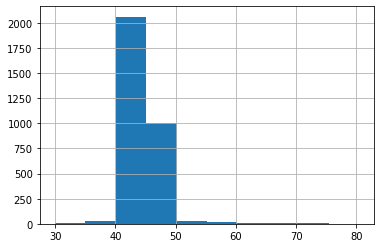

In [14]:
data['AvgK'].hist() 

<AxesSubplot:>

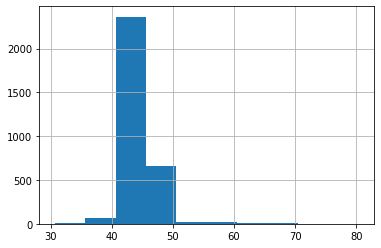

In [15]:
data['Spherical'].hist()

***

In order to get a high accuracy score for the models , it is important to have a __clean dataset__.

* __First step__ : we have to deal with messy data, whether that means missing values, inconsistent formatting, malformed records, or nonsensical outliers.

<a name='s2-1.2'></a>
### Cleaning the data ###

In [16]:
data.isnull().sum() #checking for null elements in the dataframe

Unnamed: 0        0
idEye             0
Ks                0
Ks.Axis           0
Kf                0
                 ..
HOAs.S3456..5     0
AA.5              0
En.Anterior.      0
ESI.Anterior.     0
ESI.Posterior.    0
Length: 448, dtype: int64

There are no null values so we don't have to work on how we get those values fixed

whereas if we had missing values in some columns we can fill them using different methods such as :
* data.fillna() : we can fill them with the mean, ...

or we can simply drop the columns with :
* data.dropna()

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3157    False
3158    False
3159    False
3160    False
3161    False
Length: 3162, dtype: bool

There are no duplicated rows in the dataset 

In [18]:
#checking if the column Unnamed:0 is unique,therefore it can be an identifier instead of index column
data['Unnamed: 0'].is_unique
#data = data.set_index('Unnamed: 0')
#data.head(10)

True

We can notice that there are unuseful columns in the dataset that we can drop, in the next cell there's the code that is applied in this step:

In [19]:
data.drop(['idEye'], axis=1, inplace=True)
data.drop(['En.Anterior.'], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,Kf.1,Kf.Axis.1,AvgK.1,CYL.1,AA.1,Ecc.9.0mm..1,Ks.2,Ks.Axis.2,Kf.2,Kf.Axis.2,AvgK.2,CYL.2,AA.2,Ecc.9.0mm..2,Ks.3,Ks.Axis.3,Kf.3,Kf.Axis.3,AvgK.3,CYL.3,AA.3,Apex,Thinnest,LocationX,LocationY,Spherical,Regular,Regular.Axis,Asymmetry,Asymmetry.Axis,HigherOrder,Spherical.1,Regular.1,Regular.Axis.1,Asymmetry.1,Asymmetry.Axis.1,HigherOrder.1,Spherical.2,Regular.2,Regular.Axis.2,Asymmetry.2,Asymmetry.Axis.2,HigherOrder.2,Spherical.3,Regular.3,Regular.Axis.3,Asymmetry.3,Asymmetry.Axis.3,HigherOrder.3,Spherical.4,Regular.4,Regular.Axis.4,Asymmetry.4,Asymmetry.Axis.4,HigherOrder.4,Spherical.5,Regular.5,Regular.Axis.5,Asymmetry.5,Asymmetry.Axis.5,HigherOrder.5,Spherical.6,Regular.6,Regular.Axis.6,Asymmetry.6,Asymmetry.Axis.6,HigherOrder.6,Spherical.7,Regular.7,Regular.Axis.7,Asymmetry.7,Asymmetry.Axis.7,HigherOrder.7,X,Y,X.1,Y.1,X.2,Y.2,ApexK,Ks.0mm.,Ks.0mm..Axis,Kf.0mm.,Kf.0mm..Axis,AvgK.0mm.,CYL.0mm.,Ks.6mm.,Ks.6mm..Axis,Kf.6mm.,Kf.6mm..Axis,AvgK.6mm.,CYL.6mm.,DSI.4mm.,OSI.4mm.,MS.Axis.4mm.,DSI.5mm.,OSI.5mm.,MS.Axis.5mm.,DSI.6mm.,OSI.6mm.,MS.Axis.6mm.,DSI.9mm.,OSI.9mm.,MS.Axis.9mm.,CSI,SD_P.4mm.,CV_P.4mm.,ACP.3mm.,SAI,K.Max..8mm.,X.3,Y.3,K.Max..10mm.,X.4,Y.4,ApexK.1,Ks.0mm..1,Ks.0mm..Axis.1,Kf.0mm..1,Kf.0mm..Axis.1,AvgK.0mm..1,CYL.0mm..1,Ks.6mm..1,Ks.6mm..Axis.1,Kf.6mm..1,Kf.6mm..Axis.1,AvgK.6mm..1,CYL.6mm..1,DSI.4mm..1,OSI.4mm..1,MS.Axis.4mm..1,DSI.5mm..1,OSI.5mm..1,MS.Axis.5mm..1,DSI.6mm..1,OSI.6mm..1,MS.Axis.6mm..1,DSI.9mm..1,OSI.9mm..1,MS.Axis.9mm..1,CSI.1,SD_P.4mm..1,CV_P.4mm..1,ACP.3mm..1,SAI.1,K.Max..8mm..1,X.5,Y.5,K.Max..10mm..1,X.6,Y.6,ApexK.2,Ks.0mm..2,Ks.0mm..Axis.2,Kf.0mm..2,Kf.0mm..Axis.2,AvgK.0mm..2,CYL.0mm..2,Ks.6mm..2,Ks.6mm..Axis.2,Kf.6mm..2,Kf.6mm..Axis.2,AvgK.6mm..2,CYL.6mm..2,DSI.4mm..2,OSI.4mm..2,MS.Axis.4mm..2,DSI.5mm..2,OSI.5mm..2,MS.Axis.5mm..2,DSI.6mm..2,OSI.6mm..2,MS.Axis.6mm..2,DSI.9mm..2,OSI.9mm..2,MS.Axis.9mm..2,CSI.2,SD_P.4mm..2,CV_P.4mm..2,ACP.3mm..2,SAI.2,K.Max..8mm..2,X.7,Y.7,K.Max..10mm..2,X.8,Y.8,Steepest,X.9,Y.9,Steepest.1,X.10,Y.10,Diameter,BFS_R,BFS_Ecc,BFS_OffX,BFS_OffY,BFS_OffZ,Highest.0mm.3mm.,X.11,Y.11,Highest.3mm.6mm.,X.12,Y.12,Highest.6mm.9mm.,X.13,Y.13,Highest.0mm.5mm.,X.14,Y.14,RMS_E.3mm.,RMS_E.4mm.,RMS_E.5mm.,RMS_E.6mm.,SR_E.4mm.,BFS_R.1,BFS_Ecc.1,BFS_OffX.1,BFS_OffY.1,BFS_OffZ.1,Highest.0mm.3mm..1,X.15,Y.15,Highest.3mm.6mm..1,X.16,Y.16,Highest.6mm.9mm..1,X.17,Y.17,Highest.0mm.5mm..1,X.18,Y.18,RMS_E.3mm..1,RMS_E.4mm..1,RMS_E.5mm..1,RMS_E.6mm..1,SR_E.4mm..1,Ecc.3mm.,Ecc.4mm.,Ecc.5mm.,Ecc.6mm.,Ecc.7mm.,Ecc.8mm.,Ecc.9mm.,Ecc.12mm.,Ecc.15mm.,SR_H.3mm.,SR_H.4mm.,SR_H.5mm.,SR_H.6mm.,Avg_H.5mm.,Avg_H.6mm.,Avg_H.7mm.,Avg_H.8mm.,Avg_H.9mm.,Avg_H.10mm.,Ecc.3mm..1,Ecc.4mm..1,Ecc.5mm..1,Ecc.6mm..1,Ecc.7mm..1,Ecc.8mm..1,Ecc.9mm..1,Ecc.12mm..1,Ecc.15mm..1,SR_H.3mm..1,SR_H.4mm..1,SR_H.5mm..1,SR_H.6mm..1,Avg_H.5mm..1,Avg_H.6mm..1,Avg_H.7mm..1,Avg_H.8mm..1,Avg_H.9mm..1,Avg_H.10mm..1,CSI_T,SD_T.4mm.,SD_T.5mm.,SD_T.6mm.,CV_T.4mm.,CV_T.5mm.,CV_T.6mm.,PSI_SD.6mm.,PSI_CV.6mm.,Avg_T.6mm.,Thickest,LocationX.1,LocationY.1,Apex.1,Thinnest.4mm.,LocationX.2,LocationY.2,CSI_T.1,SD_T.4mm..1,CV_T.4mm..1,Apex.2,Thinnest.4mm..1,LocationX.3,LocationY.3,CSI_T.2,SD_T.4mm..2,CV_T.4mm..2,RMS_E.4mm..2,SR_E.4mm..2,Sph..Keratometric.,Reg..Keratometric.,Asy..Keratometric.,Hio..Keratometric.,Sph..Posterior.,Reg..Posterior.,Asy..Posterior.,Hio..Posterior.,Steepest.Posterior.,Thinnest.1,Score.Anterior.,AA.6mm..Anterior.,Score.Posterior.,AA.6mm..Posterior.,BFS.Angle0.360.Dia4.9.Float.,X.19,Y.19,Z,LD8.5,LD8.8,LD9.4,Height.Avg..Angle0.360.Dia8.FlatRate0.,R.Angle0.360.Dia8.FlatRate0.,Ks.4,Kf.4,AA.4,DSI,OSI,CSI.3,KPI,KCI,Result,MaxElv,MinElv,RangeElv,Result.1,MaxElv.1,MinElv.1,RangeElv.1,Result.2,Steepest.2,Result.3,Steepest.3,Result.4,LabelNum,Steepest.4,OffX,OffY,P_Contact,Area,AvgRc,Result.5,LabelNum.1,Steepest.5,OffX.1,OffY.1,P_Contact.1,Area.1,AvgRc.1,Result.6,Apex.3,X0deg,X45deg,X90deg,X135deg,X180deg,X225deg,X270deg,X315deg,X0deg.1,X45deg.1,X90deg.1,X135deg.1,X180deg.

##### Looking for outliers:
What is an outlier ?
* An outlier is a value that is very distinct from all the values in the dataset

<AxesSubplot:xlabel='Ecc.9.0mm.'>

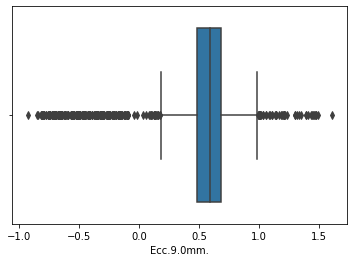

In [20]:
sns.boxplot(x='Ecc.9.0mm.', data=data)

<AxesSubplot:xlabel='Ks.Axis'>

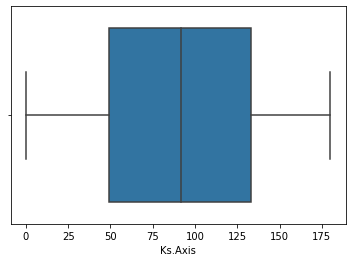

In [21]:
sns.boxplot(x='Ks.Axis', data=data)

<AxesSubplot:xlabel='Spherical'>

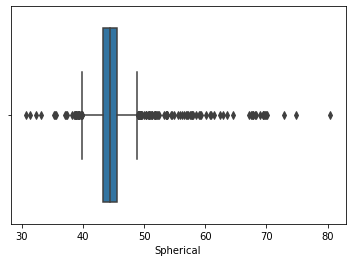

In [22]:
sns.boxplot(x='Spherical', data=data)

In [23]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR =Q3 - Q1
print(IQR)

Ks                   2.29750
Ks.Axis             84.00000
Kf                   2.32000
Kf.Axis             93.00000
AvgK                 2.26000
                      ...   
S46.sph..like..5     0.28800
HOAs.S3456..5        0.49975
AA.5                 0.00000
ESI.Anterior.        0.00000
ESI.Posterior.       7.00000
Length: 445, dtype: float64


In [24]:
print(data < (Q1 - 1.5*IQR)) or (data > Q3 + 1.5*IQR)

         Ks  Ks.Axis     Kf  Kf.Axis   AvgK    CYL     AA  Ecc.9.0mm.   ACCP  \
0     False    False  False    False  False  False   True       False  False   
1     False    False  False    False  False  False   True       False  False   
2     False    False  False    False  False  False   True       False  False   
3     False    False  False    False  False  False  False       False  False   
4     False    False  False    False  False  False  False       False  False   
...     ...      ...    ...      ...    ...    ...    ...         ...    ...   
3157  False    False  False    False  False  False  False       False  False   
3158  False    False  False    False  False  False  False       False  False   
3159  False    False  False    False  False  False  False       False  False   
3160  False    False  False    False  False  False  False       False  False   
3161  False    False  False    False  False  False  False       False  False   

       Ks.1  Ks.Axis.1   Kf.1  Kf.Axis.

,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,Kf.1,Kf.Axis.1,AvgK.1,CYL.1,AA.1,Ecc.9.0mm..1,Ks.2,Ks.Axis.2,Kf.2,Kf.Axis.2,AvgK.2,CYL.2,AA.2,Ecc.9.0mm..2,Ks.3,Ks.Axis.3,Kf.3,Kf.Axis.3,AvgK.3,CYL.3,AA.3,Apex,Thinnest,LocationX,LocationY,Spherical,Regular,Regular.Axis,Asymmetry,Asymmetry.Axis,HigherOrder,Spherical.1,Regular.1,Regular.Axis.1,Asymmetry.1,Asymmetry.Axis.1,HigherOrder.1,Spherical.2,Regular.2,Regular.Axis.2,Asymmetry.2,Asymmetry.Axis.2,HigherOrder.2,Spherical.3,Regular.3,Regular.Axis.3,Asymmetry.3,Asymmetry.Axis.3,HigherOrder.3,Spherical.4,Regular.4,Regular.Axis.4,Asymmetry.4,Asymmetry.Axis.4,HigherOrder.4,Spherical.5,Regular.5,Regular.Axis.5,Asymmetry.5,Asymmetry.Axis.5,HigherOrder.5,Spherical.6,Regular.6,Regular.Axis.6,Asymmetry.6,Asymmetry.Axis.6,HigherOrder.6,Spherical.7,Regular.7,Regular.Axis.7,Asymmetry.7,Asymmetry.Axis.7,HigherOrder.7,X,Y,X.1,Y.1,X.2,Y.2,ApexK,Ks.0mm.,Ks.0mm..Axis,Kf.0mm.,Kf.0mm..Axis,AvgK.0mm.,CYL.0mm.,Ks.6mm.,Ks.6mm..Axis,Kf.6mm.,Kf.6mm..Axis,AvgK.6mm.,CYL.6mm.,DSI.4mm.,OSI.4mm.,MS.Axis.4mm.,DSI.5mm.,OSI.5mm.,MS.Axis.5mm.,DSI.6mm.,OSI.6mm.,MS.Axis.6mm.,DSI.9mm.,OSI.9mm.,MS.Axis.9mm.,CSI,SD_P.4mm.,CV_P.4mm.,ACP.3mm.,SAI,K.Max..8mm.,X.3,Y.3,K.Max..10mm.,X.4,Y.4,ApexK.1,Ks.0mm..1,Ks.0mm..Axis.1,Kf.0mm..1,Kf.0mm..Axis.1,AvgK.0mm..1,CYL.0mm..1,Ks.6mm..1,Ks.6mm..Axis.1,Kf.6mm..1,Kf.6mm..Axis.1,AvgK.6mm..1,CYL.6mm..1,DSI.4mm..1,OSI.4mm..1,MS.Axis.4mm..1,DSI.5mm..1,OSI.5mm..1,MS.Axis.5mm..1,DSI.6mm..1,OSI.6mm..1,MS.Axis.6mm..1,DSI.9mm..1,OSI.9mm..1,MS.Axis.9mm..1,CSI.1,SD_P.4mm..1,CV_P.4mm..1,ACP.3mm..1,SAI.1,K.Max..8mm..1,X.5,Y.5,K.Max..10mm..1,X.6,Y.6,ApexK.2,Ks.0mm..2,Ks.0mm..Axis.2,Kf.0mm..2,Kf.0mm..Axis.2,AvgK.0mm..2,CYL.0mm..2,Ks.6mm..2,Ks.6mm..Axis.2,Kf.6mm..2,Kf.6mm..Axis.2,AvgK.6mm..2,CYL.6mm..2,DSI.4mm..2,OSI.4mm..2,MS.Axis.4mm..2,DSI.5mm..2,OSI.5mm..2,MS.Axis.5mm..2,DSI.6mm..2,OSI.6mm..2,MS.Axis.6mm..2,DSI.9mm..2,OSI.9mm..2,MS.Axis.9mm..2,CSI.2,SD_P.4mm..2,CV_P.4mm..2,ACP.3mm..2,SAI.2,K.Max..8mm..2,X.7,Y.7,K.Max..10mm..2,X.8,Y.8,Steepest,X.9,Y.9,Steepest.1,X.10,Y.10,Diameter,BFS_R,BFS_Ecc,BFS_OffX,BFS_OffY,BFS_OffZ,Highest.0mm.3mm.,X.11,Y.11,Highest.3mm.6mm.,X.12,Y.12,Highest.6mm.9mm.,X.13,Y.13,Highest.0mm.5mm.,X.14,Y.14,RMS_E.3mm.,RMS_E.4mm.,RMS_E.5mm.,RMS_E.6mm.,SR_E.4mm.,BFS_R.1,BFS_Ecc.1,BFS_OffX.1,BFS_OffY.1,BFS_OffZ.1,Highest.0mm.3mm..1,X.15,Y.15,Highest.3mm.6mm..1,X.16,Y.16,Highest.6mm.9mm..1,X.17,Y.17,Highest.0mm.5mm..1,X.18,Y.18,RMS_E.3mm..1,RMS_E.4mm..1,RMS_E.5mm..1,RMS_E.6mm..1,SR_E.4mm..1,Ecc.3mm.,Ecc.4mm.,Ecc.5mm.,Ecc.6mm.,Ecc.7mm.,Ecc.8mm.,Ecc.9mm.,Ecc.12mm.,Ecc.15mm.,SR_H.3mm.,SR_H.4mm.,SR_H.5mm.,SR_H.6mm.,Avg_H.5mm.,Avg_H.6mm.,Avg_H.7mm.,Avg_H.8mm.,Avg_H.9mm.,Avg_H.10mm.,Ecc.3mm..1,Ecc.4mm..1,Ecc.5mm..1,Ecc.6mm..1,Ecc.7mm..1,Ecc.8mm..1,Ecc.9mm..1,Ecc.12mm..1,Ecc.15mm..1,SR_H.3mm..1,SR_H.4mm..1,SR_H.5mm..1,SR_H.6mm..1,Avg_H.5mm..1,Avg_H.6mm..1,Avg_H.7mm..1,Avg_H.8mm..1,Avg_H.9mm..1,Avg_H.10mm..1,CSI_T,SD_T.4mm.,SD_T.5mm.,SD_T.6mm.,CV_T.4mm.,CV_T.5mm.,CV_T.6mm.,PSI_SD.6mm.,PSI_CV.6mm.,Avg_T.6mm.,Thickest,LocationX.1,LocationY.1,Apex.1,Thinnest.4mm.,LocationX.2,LocationY.2,CSI_T.1,SD_T.4mm..1,CV_T.4mm..1,Apex.2,Thinnest.4mm..1,LocationX.3,LocationY.3,CSI_T.2,SD_T.4mm..2,CV_T.4mm..2,RMS_E.4mm..2,SR_E.4mm..2,Sph..Keratometric.,Reg..Keratometric.,Asy..Keratometric.,Hio..Keratometric.,Sph..Posterior.,Reg..Posterior.,Asy..Posterior.,Hio..Posterior.,Steepest.Posterior.,Thinnest.1,Score.Anterior.,AA.6mm..Anterior.,Score.Posterior.,AA.6mm..Posterior.,BFS.Angle0.360.Dia4.9.Float.,X.19,Y.19,Z,LD8.5,LD8.8,LD9.4,Height.Avg..Angle0.360.Dia8.FlatRate0.,R.Angle0.360.Dia8.FlatRate0.,Ks.4,Kf.4,AA.4,DSI,OSI,CSI.3,KPI,KCI,Result,MaxElv,MinElv,RangeElv,Result.1,MaxElv.1,MinElv.1,RangeElv.1,Result.2,Steepest.2,Result.3,Steepest.3,Result.4,LabelNum,Steepest.4,OffX,OffY,P_Contact,Area,AvgRc,Result.5,LabelNum.1,Steepest.5,OffX.1,OffY.1,P_Contact.1,Area.1,AvgRc.1,Result.6,Apex.3,X0deg,X45deg,X90deg,X135deg,X180deg,X225deg,X270deg,X315deg,X0deg.1,X45deg.1,X90deg.1,X135deg.1,X180deg.

__Any Data point that is < (Q1 - 1.5*IQR) or > (Q3 + 1.5*IQR) is considered as an outlier__

As a solution to this, the easiest way to get rid of outliers is that we drop them from our dataset. But i choose here to replace them with the median values :

<a name='s2-1.3'></a>
### Normalisation of the data ###

#### Why do we need to normalize the data? 
`Normalisation` is a statistical technique that is mostly used when handling large amount of data, with each feature having a different scale. For example some features might be measured in centimeters while other are in millimeters or any other scale.

Thus we need to apply normalisation to __make all the variations of the data between 0 and 1__.
* NB: Normalisation is most commonly used on data sets when the upper and lower limits are known and when the data is relatively evenly distributed across that range. [12](https://www.indeed.com/career-advice/career-development/normalization-formula#:~:text=This%20normalization%20formula%2C%20also%20called%20scaling%20to%20a%20range%20or%20feature%20scaling%2C%20is%20most%20commonly%20used%20on%20data%20sets%20when%20the%20upper%20and%20lower%20limits%20are%20known%20and%20when%20the%20data%20is%20relatively%20evenly%20distributed%20across%20that%20range.)


* #### Z-score Normalisation

In [25]:
# Normalisation formula : 
# xnormalized = (x - xminimum) / range of x
# range of x values= xmax-xmin
import scipy.stats as stats
normalized_data= data.apply(stats.zscore)
normalized_data.head(5)

,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,Kf.1,Kf.Axis.1,AvgK.1,CYL.1,AA.1,Ecc.9.0mm..1,Ks.2,Ks.Axis.2,Kf.2,Kf.Axis.2,AvgK.2,CYL.2,AA.2,Ecc.9.0mm..2,Ks.3,Ks.Axis.3,Kf.3,Kf.Axis.3,AvgK.3,CYL.3,AA.3,Apex,Thinnest,LocationX,LocationY,Spherical,Regular,Regular.Axis,Asymmetry,Asymmetry.Axis,HigherOrder,Spherical.1,Regular.1,Regular.Axis.1,Asymmetry.1,Asymmetry.Axis.1,HigherOrder.1,Spherical.2,Regular.2,Regular.Axis.2,Asymmetry.2,Asymmetry.Axis.2,HigherOrder.2,Spherical.3,Regular.3,Regular.Axis.3,Asymmetry.3,Asymmetry.Axis.3,HigherOrder.3,Spherical.4,Regular.4,Regular.Axis.4,Asymmetry.4,Asymmetry.Axis.4,HigherOrder.4,Spherical.5,Regular.5,Regular.Axis.5,Asymmetry.5,Asymmetry.Axis.5,HigherOrder.5,Spherical.6,Regular.6,Regular.Axis.6,Asymmetry.6,Asymmetry.Axis.6,HigherOrder.6,Spherical.7,Regular.7,Regular.Axis.7,Asymmetry.7,Asymmetry.Axis.7,HigherOrder.7,X,Y,X.1,Y.1,X.2,Y.2,ApexK,Ks.0mm.,Ks.0mm..Axis,Kf.0mm.,Kf.0mm..Axis,AvgK.0mm.,CYL.0mm.,Ks.6mm.,Ks.6mm..Axis,Kf.6mm.,Kf.6mm..Axis,AvgK.6mm.,CYL.6mm.,DSI.4mm.,OSI.4mm.,MS.Axis.4mm.,DSI.5mm.,OSI.5mm.,MS.Axis.5mm.,DSI.6mm.,OSI.6mm.,MS.Axis.6mm.,DSI.9mm.,OSI.9mm.,MS.Axis.9mm.,CSI,SD_P.4mm.,CV_P.4mm.,ACP.3mm.,SAI,K.Max..8mm.,X.3,Y.3,K.Max..10mm.,X.4,Y.4,ApexK.1,Ks.0mm..1,Ks.0mm..Axis.1,Kf.0mm..1,Kf.0mm..Axis.1,AvgK.0mm..1,CYL.0mm..1,Ks.6mm..1,Ks.6mm..Axis.1,Kf.6mm..1,Kf.6mm..Axis.1,AvgK.6mm..1,CYL.6mm..1,DSI.4mm..1,OSI.4mm..1,MS.Axis.4mm..1,DSI.5mm..1,OSI.5mm..1,MS.Axis.5mm..1,DSI.6mm..1,OSI.6mm..1,MS.Axis.6mm..1,DSI.9mm..1,OSI.9mm..1,MS.Axis.9mm..1,CSI.1,SD_P.4mm..1,CV_P.4mm..1,ACP.3mm..1,SAI.1,K.Max..8mm..1,X.5,Y.5,K.Max..10mm..1,X.6,Y.6,ApexK.2,Ks.0mm..2,Ks.0mm..Axis.2,Kf.0mm..2,Kf.0mm..Axis.2,AvgK.0mm..2,CYL.0mm..2,Ks.6mm..2,Ks.6mm..Axis.2,Kf.6mm..2,Kf.6mm..Axis.2,AvgK.6mm..2,CYL.6mm..2,DSI.4mm..2,OSI.4mm..2,MS.Axis.4mm..2,DSI.5mm..2,OSI.5mm..2,MS.Axis.5mm..2,DSI.6mm..2,OSI.6mm..2,MS.Axis.6mm..2,DSI.9mm..2,OSI.9mm..2,MS.Axis.9mm..2,CSI.2,SD_P.4mm..2,CV_P.4mm..2,ACP.3mm..2,SAI.2,K.Max..8mm..2,X.7,Y.7,K.Max..10mm..2,X.8,Y.8,Steepest,X.9,Y.9,Steepest.1,X.10,Y.10,Diameter,BFS_R,BFS_Ecc,BFS_OffX,BFS_OffY,BFS_OffZ,Highest.0mm.3mm.,X.11,Y.11,Highest.3mm.6mm.,X.12,Y.12,Highest.6mm.9mm.,X.13,Y.13,Highest.0mm.5mm.,X.14,Y.14,RMS_E.3mm.,RMS_E.4mm.,RMS_E.5mm.,RMS_E.6mm.,SR_E.4mm.,BFS_R.1,BFS_Ecc.1,BFS_OffX.1,BFS_OffY.1,BFS_OffZ.1,Highest.0mm.3mm..1,X.15,Y.15,Highest.3mm.6mm..1,X.16,Y.16,Highest.6mm.9mm..1,X.17,Y.17,Highest.0mm.5mm..1,X.18,Y.18,RMS_E.3mm..1,RMS_E.4mm..1,RMS_E.5mm..1,RMS_E.6mm..1,SR_E.4mm..1,Ecc.3mm.,Ecc.4mm.,Ecc.5mm.,Ecc.6mm.,Ecc.7mm.,Ecc.8mm.,Ecc.9mm.,Ecc.12mm.,Ecc.15mm.,SR_H.3mm.,SR_H.4mm.,SR_H.5mm.,SR_H.6mm.,Avg_H.5mm.,Avg_H.6mm.,Avg_H.7mm.,Avg_H.8mm.,Avg_H.9mm.,Avg_H.10mm.,Ecc.3mm..1,Ecc.4mm..1,Ecc.5mm..1,Ecc.6mm..1,Ecc.7mm..1,Ecc.8mm..1,Ecc.9mm..1,Ecc.12mm..1,Ecc.15mm..1,SR_H.3mm..1,SR_H.4mm..1,SR_H.5mm..1,SR_H.6mm..1,Avg_H.5mm..1,Avg_H.6mm..1,Avg_H.7mm..1,Avg_H.8mm..1,Avg_H.9mm..1,Avg_H.10mm..1,CSI_T,SD_T.4mm.,SD_T.5mm.,SD_T.6mm.,CV_T.4mm.,CV_T.5mm.,CV_T.6mm.,PSI_SD.6mm.,PSI_CV.6mm.,Avg_T.6mm.,Thickest,LocationX.1,LocationY.1,Apex.1,Thinnest.4mm.,LocationX.2,LocationY.2,CSI_T.1,SD_T.4mm..1,CV_T.4mm..1,Apex.2,Thinnest.4mm..1,LocationX.3,LocationY.3,CSI_T.2,SD_T.4mm..2,CV_T.4mm..2,RMS_E.4mm..2,SR_E.4mm..2,Sph..Keratometric.,Reg..Keratometric.,Asy..Keratometric.,Hio..Keratometric.,Sph..Posterior.,Reg..Posterior.,Asy..Posterior.,Hio..Posterior.,Steepest.Posterior.,Thinnest.1,Score.Anterior.,AA.6mm..Anterior.,Score.Posterior.,AA.6mm..Posterior.,BFS.Angle0.360.Dia4.9.Float.,X.19,Y.19,Z,LD8.5,LD8.8,LD9.4,Height.Avg..Angle0.360.Dia8.FlatRate0.,R.Angle0.360.Dia8.FlatRate0.,Ks.4,Kf.4,AA.4,DSI,OSI,CSI.3,KPI,KCI,Result,MaxElv,MinElv,RangeElv,Result.1,MaxElv.1,MinElv.1,RangeElv.1,Result.2,Steepest.2,Result.3,Steepest.3,Result.4,LabelNum,Steepest.4,OffX,OffY,P_Contact,Area,AvgRc,Result.5,LabelNum.1,Steepest.5,OffX.1,OffY.1,P_Contact.1,Area.1,AvgRc.1,Result.6,Apex.3,X0deg,X45deg,X90deg,X135deg,X180deg,X225deg,X270deg,X315deg,X0deg.1,X45deg.1,X90deg.1,X135deg.1,X180deg.

As a general rule, __z-scores lower than -3 or higher than 3__ are considered unusual and interesting. That is, they are statistically significant `outliers`.

<AxesSubplot:xlabel='Ecc.9.0mm.'>

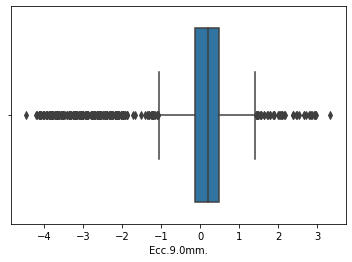

In [26]:
sns.boxplot(x='Ecc.9.0mm.', data=normalized_data)